   Temperature   Humidity   Pressure  Wind_Speed  Precipitation
0    54.881350  71.518937  60.276338   54.488318      42.365480
1    64.589411  43.758721  89.177300   96.366276      38.344152
2    79.172504  52.889492  56.804456   92.559664       7.103606
3     8.712930   2.021840  83.261985   77.815675      87.001215
4    97.861834  79.915856  46.147936   78.052918      11.827443


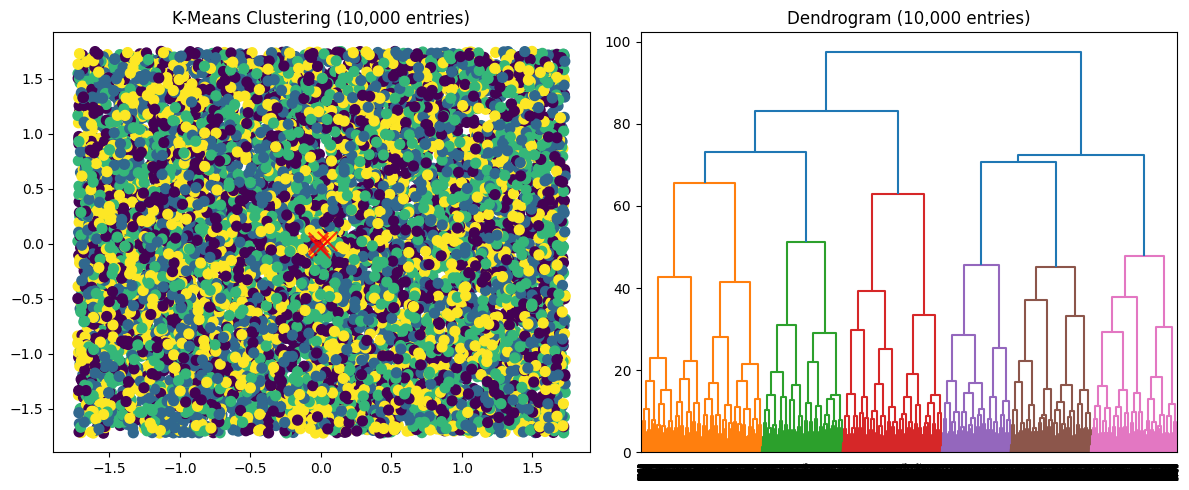

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_excel(r"C:\Users\91705\Downloads\updated_dataset_10000_entries.xlsx")

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# K-Means Clustering (with 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

# Plot K-Means Clustering results
plt.figure(figsize=(14, 6))

# K-Means Clustering scatter plot
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('K-Means Clustering (10,000 entries)')
plt.xlabel('Feature 1 (Temperature)')
plt.ylabel('Feature 2 (Humidity)')

# Dendrogram (Hierarchical Clustering)
linked = linkage(X_scaled, method='ward')
plt.subplot(1, 2, 2)
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram (10,000 entries)')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Euclidean)')

# Display the plots
plt.tight_layout()
plt.show()
